# School of Hard Knocks

This notebook is a dive into Machine Learning and Data Science by using a fake school of test data. By carefully and deliberately generating a fake school's test results, we can insert patterns, irregularities and trends and test our analysis to make sure we pick it up.


In [3]:
# Required libraries and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from random import shuffle

class Generator:
    """
    Handles the generation of students results for analysis.
    """
    
    def __init__(self, limit):

        self.students = self._get_students()
            
        self.limit = limit

    def _get_students(self):
        """Create the initail student list"""
        with open("names_male.txt", 'r') as f:
            males = [name.split(' ')[0] for name in f.readlines()] 
        with open("names_female.txt", 'r') as f:
            females = [name.split(' ')[0] for name in f.readlines()]
        
        rint = np.random.randint

        students = [{'Name': name,
                    'Gender': 'Male',
                    'Score': rint(0, 101)} for name in males]

        students += [{'Name': female,
                     'Gender': 'Female',
                     'Score': rint(0, 101)} for female in females]
        shuffle(students)
        return students
        
    def get_names(self):
        return pd.Series([stu['Name'] for stu in self.students[0: self.limit]])
    
    def get_scores(self):
        return pd.Series([stu['Score'] for stu in self.students[0: self.limit]])

    def get_genders(self):
        return pd.Series([stu['Gender'] for stu in self.students[0: self.limit]])
    
gen = Generator(10)
results = pd.DataFrame({"Name": gen.get_names(),
                        "Score": gen.get_scores(),
                        "Gender": gen.get_genders()})
results




,Gender,Name,Score
0,Male,Gregorio,31
1,Female,Kenyetta,12
2,Female,Yun,73
3,Female,Fidela,29
4,Female,Deidra,98
5,Female,Daniela,47
6,Female,Gertrudis,22
7,Male,Leon,14
8,Male,Lanny,63
9,Female,Janee,53


(array([ 3.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.]),
 array([  1. ,   8.3,  15.6,  22.9,  30.2,  37.5,  44.8,  52.1,  59.4,
         66.7,  74. ]),
 <a list of 10 Patch objects>)

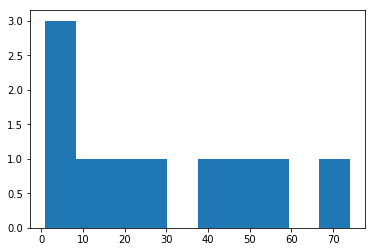

In [14]:
fig, ax = plt.subplots()
ax.hist(results['Score'])


In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']

In [47]:
cities['City name'].apply(lambda c: c.startswith('San')) & cities['Area square miles'].apply(lambda c: c > 50)

0    False
1     True
2    False
dtype: bool

In [57]:
cities.reindex(np.random.permutation(cities.index))
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
2,San Jose,1015785,176.53,5754.177760
1,Sacramento,485199,97.92,4955.055147
